# Data Mining, Machine Learning and Deep Learning

## Exploratory Data Analysis and Decision Trees

### Mandatory Assignment 1 => Forest Fires Dataset

#### By Alin Cristian Preda

This small project attempts to predict the area of potential forest fires based upon certain features. It uses supervised machine learning in the form of multivariate regression analysis. A decision tree is then built.

In [19]:
%matplotlib inline
import numpy as np # For linear algebra 
import pandas as pd # For working with csv files
import matplotlib.pyplot as plt # For charts
import seaborn as sns # Let's make the charts prettier
sns.set()

In [20]:
# This is the data frame for the Portuguese forest fires dataset. 
df = pd.read_csv("https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFires.csv")

## A. Exploratory data analysis 

In [3]:
# This is how the data frame looks
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### 1. How many rows and columns are there in your selected dataset?

In [4]:
# The data frame's shape is 517 rows and 13 columns 
df.shape

(517, 13)

### 2. Are there any missing values in any of the columns?

In [5]:
# There are absolutely no missing values in any of the columns
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

### 3. Plot the histogram of the following colums:
####                   For forest fires: the wind column:
We can see that the wind speeds follow a somewhat normalised distribution with a slight right skew;

Most wind speeds are recorded to be between 4km/h and 5km/h.

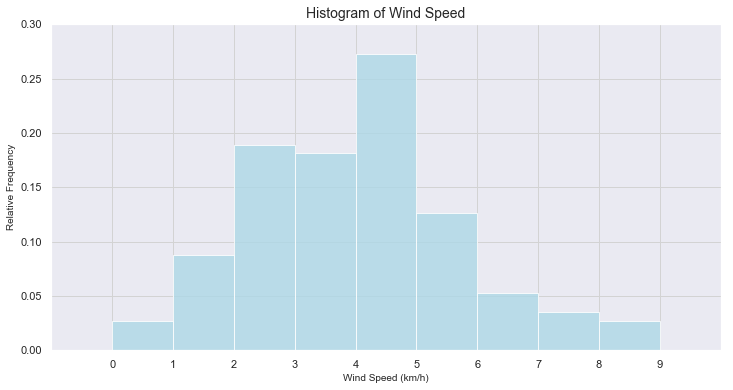

In [7]:
# Data to be plotted 
x = df.wind
# The figure size must be specified before plotting-
plt.figure(figsize=(12,6))
# Describe the Histogram
bin_edges = np.arange(0,10,1)
plt.hist(x, density = True, bins = bin_edges, facecolor = "lightblue", alpha = 0.8)
# Labels
plt.xlabel('Wind Speed (km/h)', size = 10)
plt.ylabel('Relative Frequency', size = 10)
plt.title('Histogram of Wind Speed', size = 14)
# Gridlines 
plt.grid(True, color = "lightgrey") 
# This regulates the ticks 
plt.axis([-1,10,0,0.3])
# Changing the tick marks 
plt.xticks(np.arange(0, 10, 1))
# Show the histogram
plt.show()

### 4. Draw the scatterplot of these two columns:
#### Forest fires: temp vs. RH
As can be seen from the scatterplot, there is correlation, at least to some degree, between the two variables; 

As temperature rises, humidity generally drops; 

Thus, there exists a negative correlation between the variables;

Also, we can see that most temperatures are between 20 and 60 degrees Celsius and humidity is usually above 15%.

Text(0.5, 1.0, 'Temperature vs RH Scatterplot')

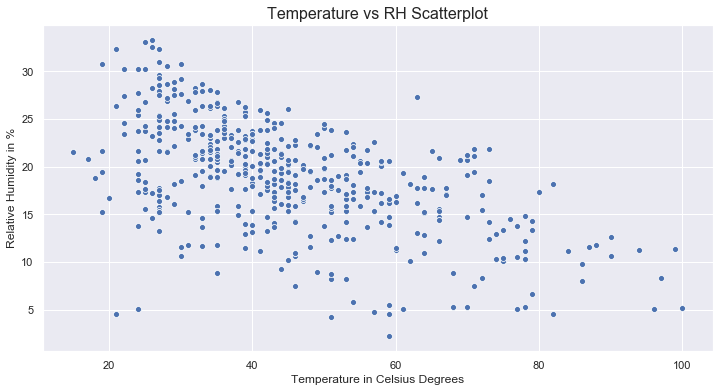

In [8]:
# Creating the scatterplot
plt.figure(figsize=(12,6))
x = df.temp
y = df.RH
ax = sns.scatterplot(y,x,alpha = 1)
# Naming the axes
ax.set_xlabel(xlabel="Temperature in Celsius Degrees", fontsize=12)
ax.set_ylabel(ylabel="Relative Humidity in %", fontsize=12)
ax.set_title(label="Temperature vs RH Scatterplot", fontsize=16)

## B. Decision trees

### 5. Split your dataset into training and test sets, allocating 25% of the data to the test set.

In [9]:
# From Sklearn, I’ve imported the datasets module, so I can load a sample dataset, and the linear_model, so I can run a linear regression
from sklearn import datasets, linear_model
# From Sklearn, sub-library model_selection, I’ve imported the train_test_split so I can split to training and test sets
from sklearn.model_selection import train_test_split

In [10]:
# We need to change our categorical type variables to some kind of number.
# Month
df["month"] = df.month.map({'jan': 1, 'feb': 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})
# Day
df["day"] = df.day.map({'mon': 1, 'tue': 2, "wed": 3, "thu": 4, "fri": 5, "sat": 6, "sun": 7})
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
# The independent variables, We select the desired features
features = ["X", "Y",'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
x = df[features]
# The dependant variable
y = df.area
# Splitting the dataset 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .25)
print("Testing dataset shape: ",len(xTest))
print("Training dataset shape: ",len(xTrain))

Testing dataset shape:  130
Training dataset shape:  387


### 6. Train a decision tree model. Set the max_depth parameter of the decision tree to 5. Use as the labels column (the dependent variable): Forest fires: area

#### 6.1 Building the model

In [12]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(xTrain, yTrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### 6.2 Visualizing the tree

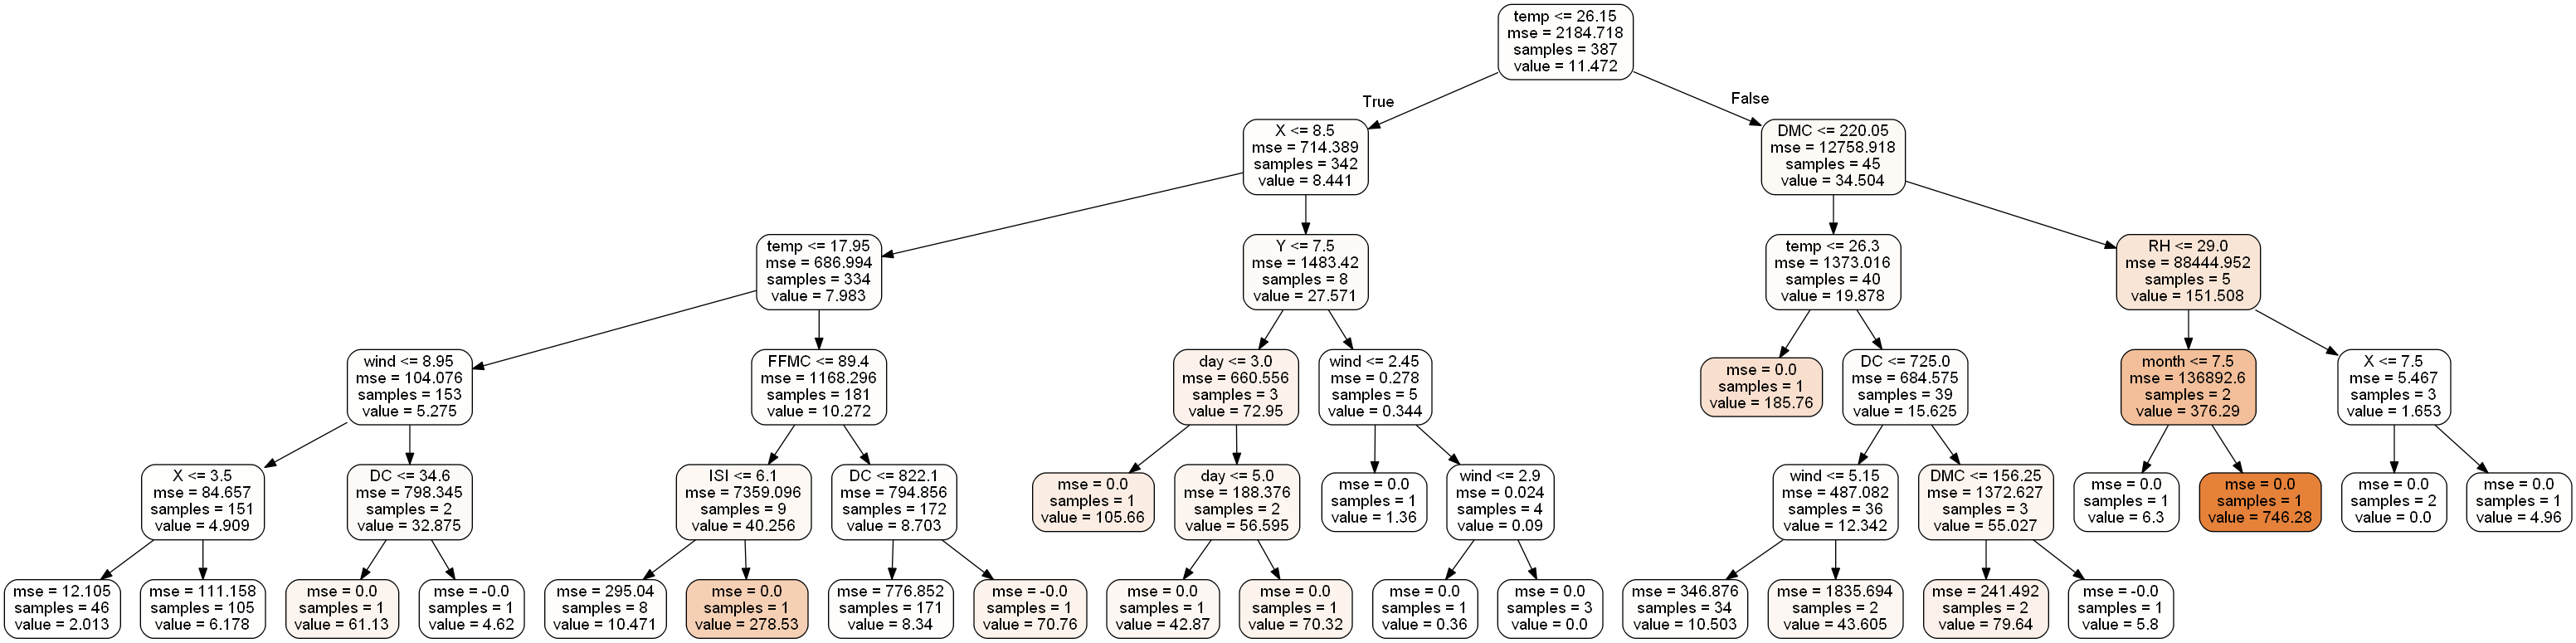

In [13]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(
        reg,
        out_file= dot_data,
        feature_names=features,
        rounded=True,
        filled=True
    )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 6.4 Feature importance

In [14]:
featureImportances = list(zip(features, reg.feature_importances_))
list(sorted(featureImportances, key = lambda x: x[1], reverse = True))

[('month', 0.4013814481425526),
 ('RH', 0.24691594423403124),
 ('DMC', 0.11822302996894524),
 ('ISI', 0.09363857180338514),
 ('temp', 0.08401351346627736),
 ('DC', 0.015416700406996277),
 ('Y', 0.014490842031683158),
 ('FFMC', 0.012482688955493683),
 ('wind', 0.005299626776356514),
 ('X', 0.005232420454850391),
 ('day', 0.0029052137594283486),
 ('rain', 0.0)]

### 7. Calculate an accuracy metric appropriate for your dataset

#### Evaluating the accuracy of the model using RMSE and MAE

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
yPred = reg.predict(xTest)
rmse = np.sqrt(mean_squared_error(yPred, yTest))
print("RMSE:", rmse)

RMSE: 100.39289567769505


In [16]:
mae = mean_absolute_error(yPred, yTest)
print("MAE:", mae) # Less sensitive to outliers than MSE/RMSE

MAE: 22.78983025273772


Interpretation: According to MAE, the average difference between the predicted and the actual forest fire area is 11.13 ha. We know that this metric is ess sensitive to outliers than MSE/RMSE.

Regarding the RMSE, the effect of squaring the errors gives more weight to the larger errors than smaller ones, skewing the error estimate towards the odd outliers.

### 8. Now retrain the decision tree with the following parameters of max_depth: 15 and 25. 

#### Each time, calculate the same accuracy metric as you did in (7). Which value of max_depth gives you the best-performing model?

In [17]:
# We will apply regression to the Forest Fires datase
reg = DecisionTreeRegressor(max_depth=15) 
reg.fit(xTrain, yTrain)
# Accuracy
yPred = reg.predict(xTest)
rmse = np.sqrt(mean_squared_error(yPred, yTest))
print("RMSE:", rmse)
mae = mean_absolute_error(yPred, yTest)
print("MAE:", mae)

RMSE: 103.8602206063228
MAE: 25.380674627337093


In [18]:
# We will apply regression to the Forest Fires datase
reg = DecisionTreeRegressor(max_depth=25) 
reg.fit(xTrain, yTrain)
# Accuracy
yPred = reg.predict(xTest)
rmse = np.sqrt(mean_squared_error(yPred, yTest))
print("RMSE:", rmse)
mae = mean_absolute_error(yPred, yTest)
print("MAE:", mae)

RMSE: 102.47930206782097
MAE: 25.051076923076923


Both the MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better. 
This means that the first model is the best. The third model actually does a little bit better than the second one.
